In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Get Daily data

In [24]:
! rm states.csv
! wget https://covidtracking.com/api/states.csv --no-check-certificate

--2020-04-02 10:21:47--  https://covidtracking.com/api/states.csv
Resolving covidtracking.com (covidtracking.com)... 2604:a880:400:d1::89c:7001, 157.245.130.6
Connecting to covidtracking.com (covidtracking.com)|2604:a880:400:d1::89c:7001|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 12848 (13K) [text/csv]
Saving to: ‘states.csv’

states.csv          100%[===================>]  12.55K  --.-KB/s    in 0.02s   

2020-04-02 10:21:47 (637 KB/s) - ‘states.csv’ saved [12848/12848]



In [25]:
! rm daily.csv
! wget http://covidtracking.com/api/states/daily.csv --no-check-certificate

--2020-04-02 10:21:47--  http://covidtracking.com/api/states/daily.csv
Resolving covidtracking.com (covidtracking.com)... 2604:a880:400:d1::89c:7001, 157.245.130.6
Connecting to covidtracking.com (covidtracking.com)|2604:a880:400:d1::89c:7001|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 164899 (161K) [text/csv]
Saving to: ‘daily.csv’

daily.csv           100%[===================>] 161.03K  --.-KB/s    in 0.08s   

2020-04-02 10:21:48 (1.99 MB/s) - ‘daily.csv’ saved [164899/164899]



In [26]:
states = pd.read_csv('states.csv')
daily = pd.read_csv('daily.csv')
daily['date']= pd.to_datetime(daily['date'],format='%Y%m%d')
daily['frac'] = daily['positive']/daily['total']
daily = daily[daily['state']!='AS']
# remove territories
states = states[states['state']!='AS']
states = states[states['state']!='MP']
states = states[states['state']!='GU']
states = states[states['state']!='PR']
states = states[states['state']!='VI']

In [27]:
dates = np.sort(daily['date'].unique())

## Total # of positive cases

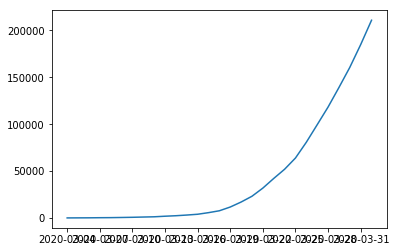

In [28]:
plt.plot(dates, daily.groupby('date')['positive'].sum())

In [29]:
len(np.sort(daily['date'].unique()))

29

## Normalized # of cases for each state

Number of cases for each state, normalized (divide by the largest # of cases in each state)

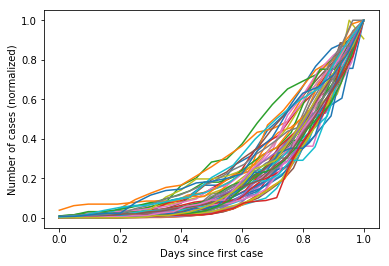

In [30]:
state_list = states['state']
fig, ax = plt.subplots()
for state in state_list:
    S = daily.copy()
    S =S[S['state'] == state].sort_values('date')
    S['cumpos'] = S['positive'].cumsum()
    S = S[S['cumpos']>0].reset_index(drop=True)
    S['normalized_index'] = S.index/max(S.index)
    
    plt.plot(S['normalized_index'],S['positive']/max(S['positive']))#,S['date'],S['negative'],S['date'],S['total'])
    plt.ylabel('Number of cases (normalized)')
    plt.xlabel('Days since first case (normalized)')
    every_nth = 1
    for n, label in enumerate(ax.xaxis.get_ticklabels()):
        if n % every_nth != 0:
            label.set_visible(False)
datelist = np.sort(daily['date'].unique())
#plt.plot(datelist,[r/(len(datelist)-1) for r in range(0,len(datelist))],linestyle='dashed',color='black')
plt.show()

Visualize each state

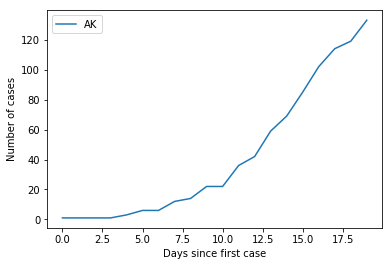

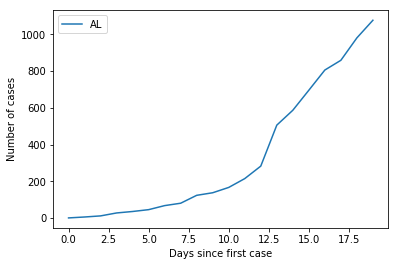

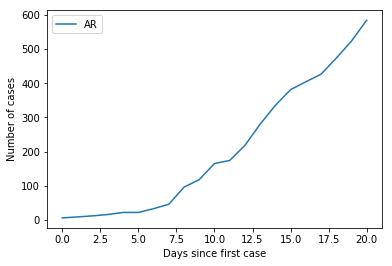

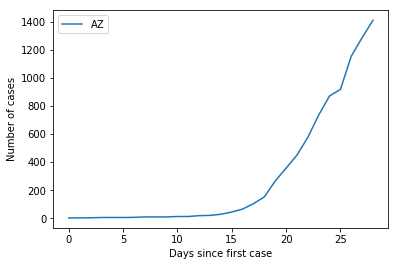

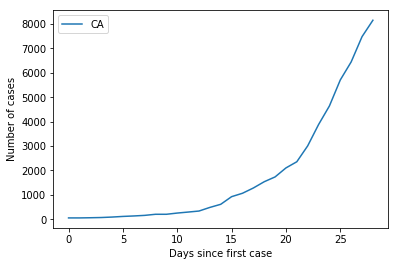

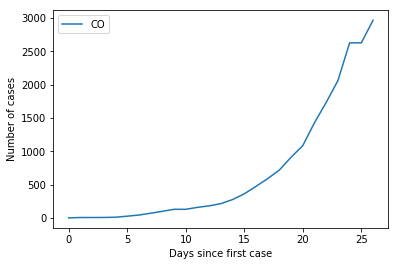

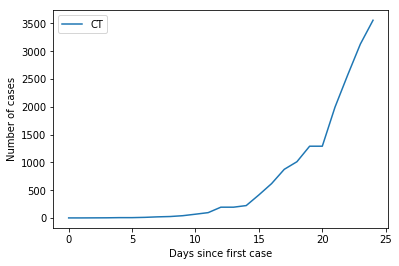

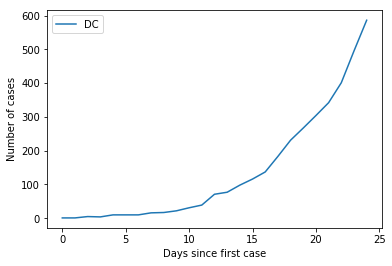

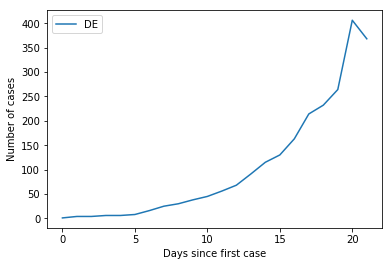

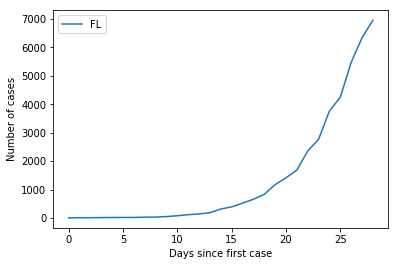

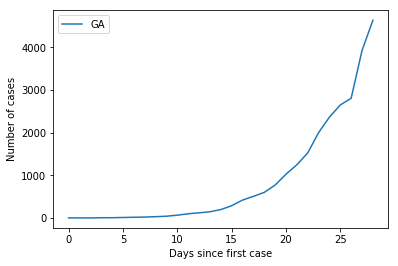

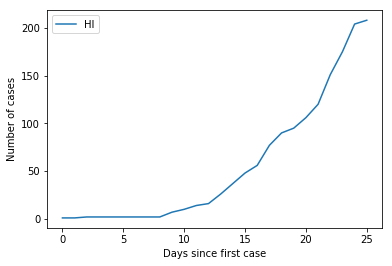

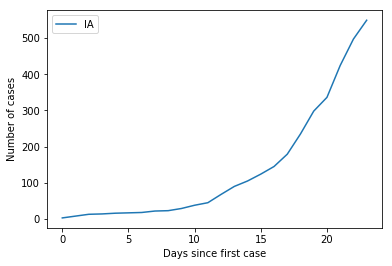

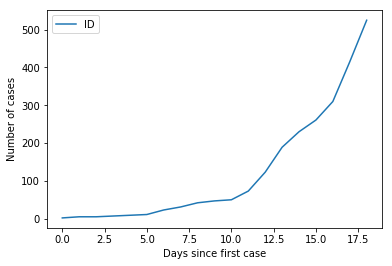

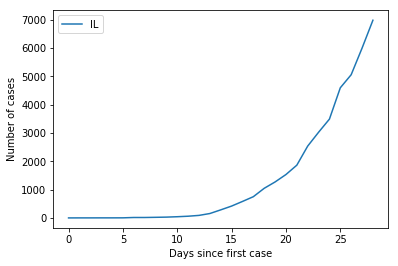

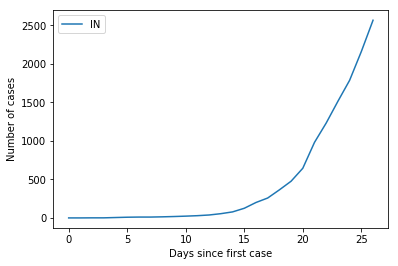

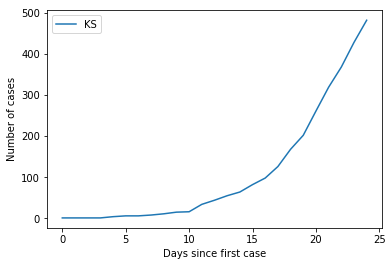

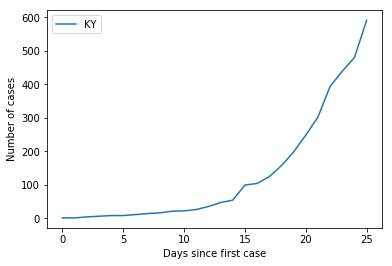

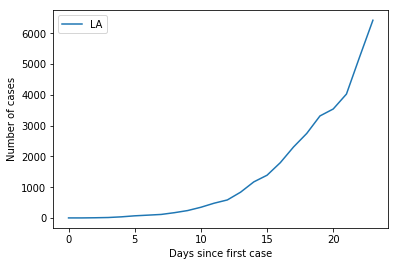

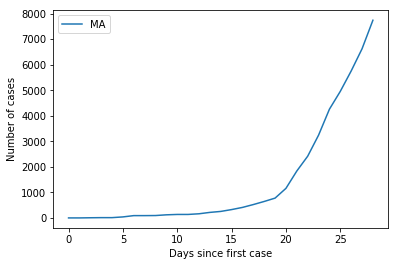

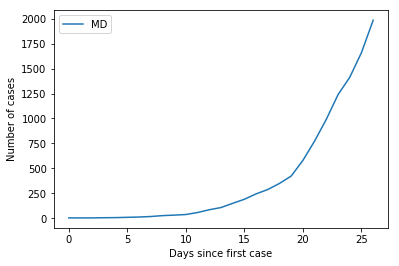

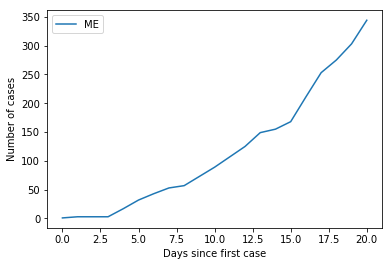

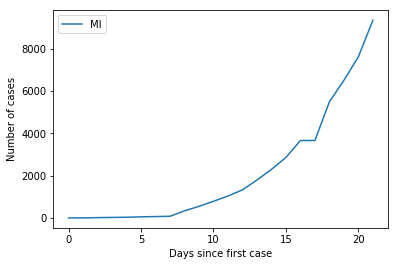

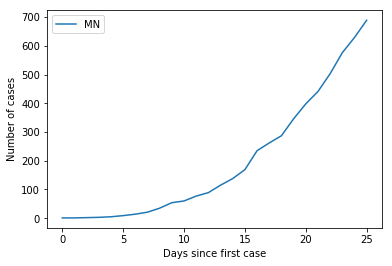

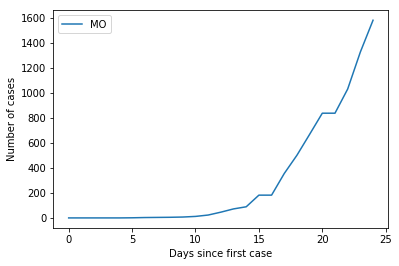

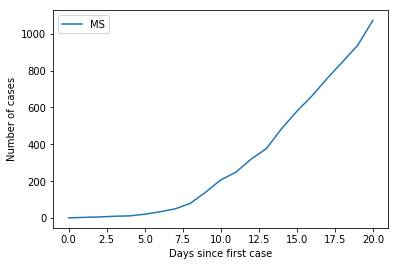

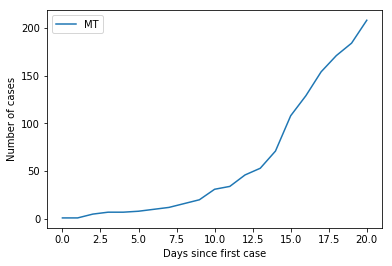

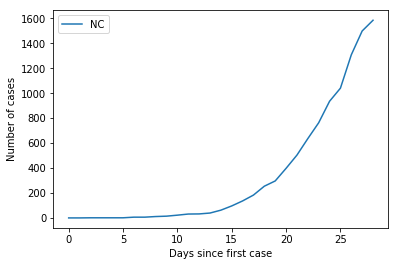

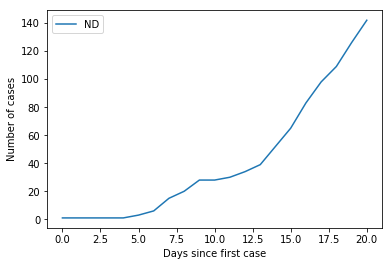

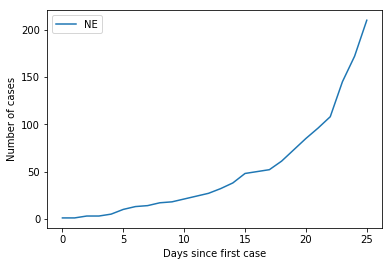

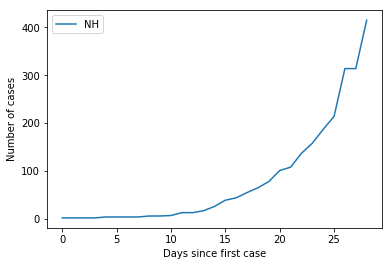

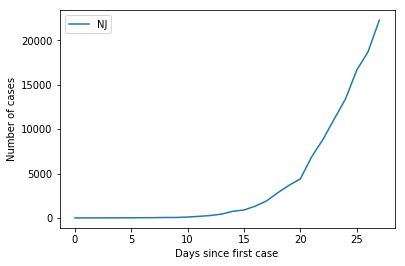

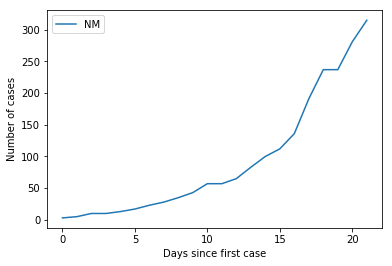

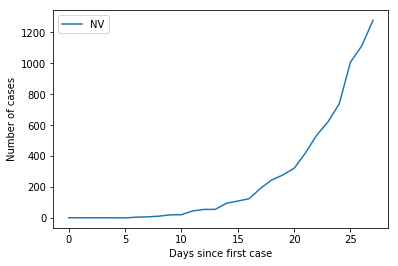

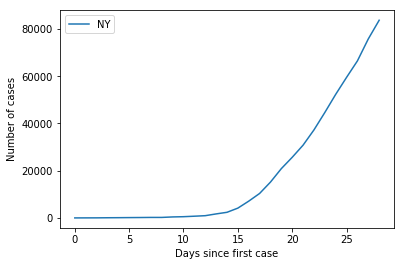

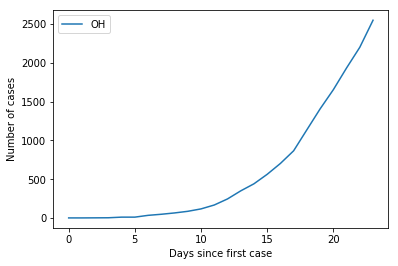

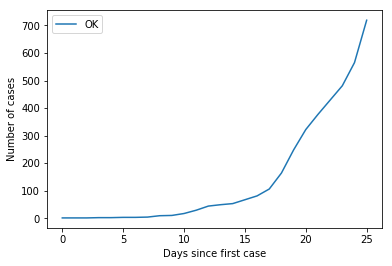

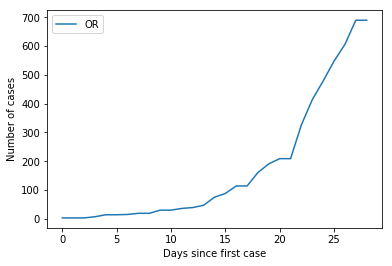

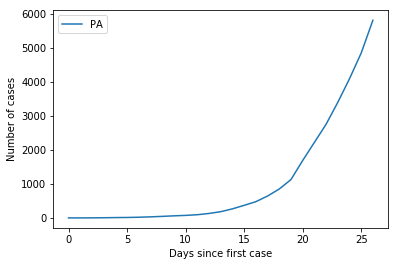

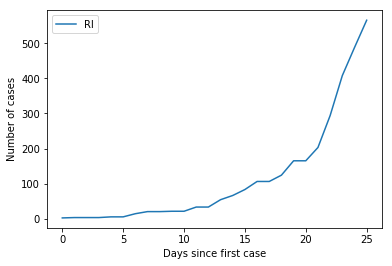

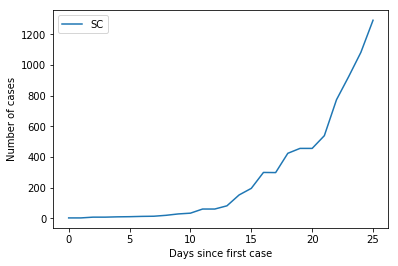

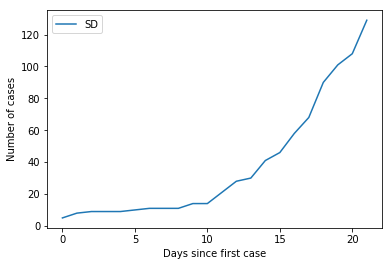

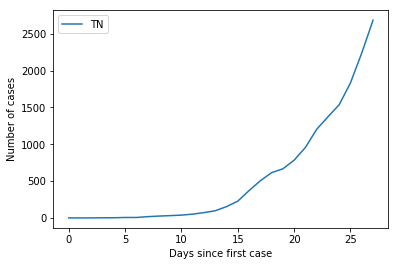

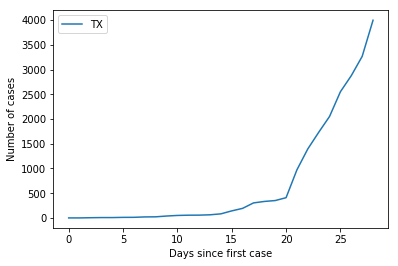

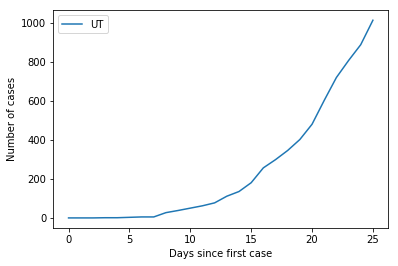

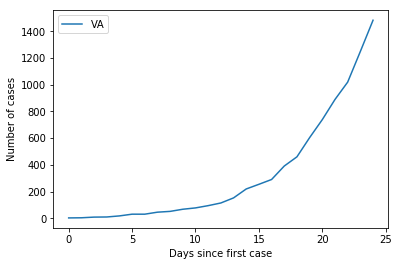

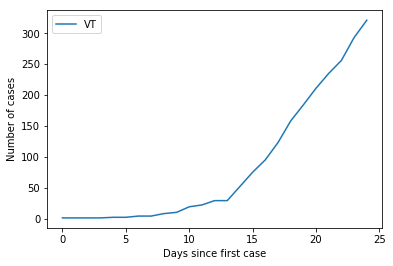

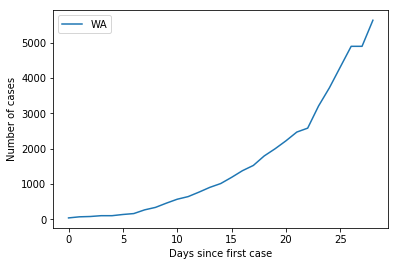

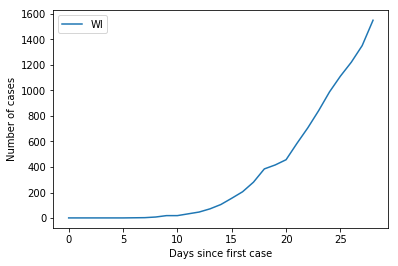

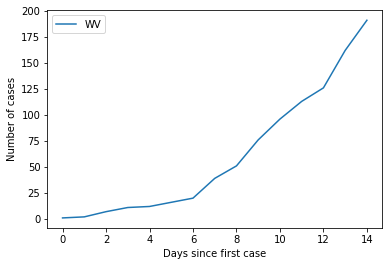

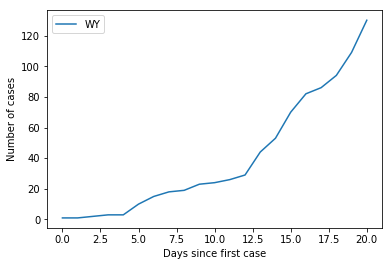

In [31]:
state_list = states['state']
fig, ax = plt.subplots()
for state in state_list:
    S = daily.copy()
    S =S[S['state'] == state].sort_values('date')
    S['cumpos'] = S['positive'].cumsum()
    S = S[S['cumpos']>0].reset_index(drop=True)
    
    plt.plot(S.index,S['positive'])#,S['date'],S['negative'],S['date'],S['total'])
    plt.ylabel('Number of cases')
    plt.xlabel('Days since first case')
    plt.legend([state])
    plt.show()

### Fraction of positive cases out of all tests

total positive # of cases / total # of tests, per day

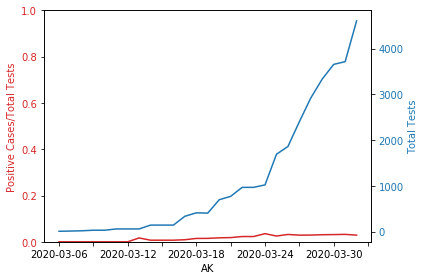

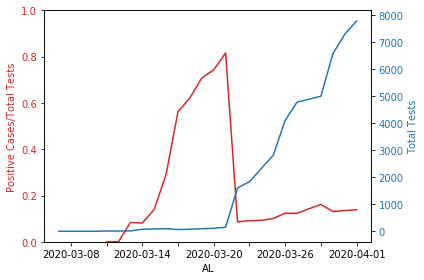

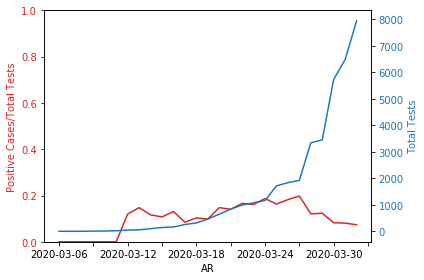

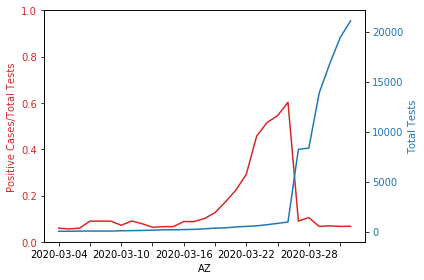

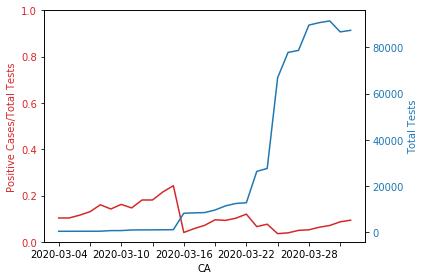

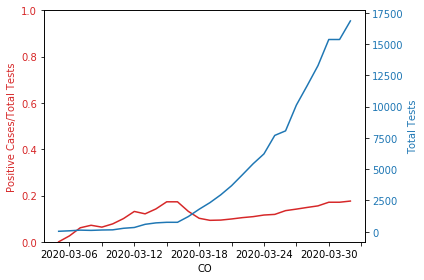

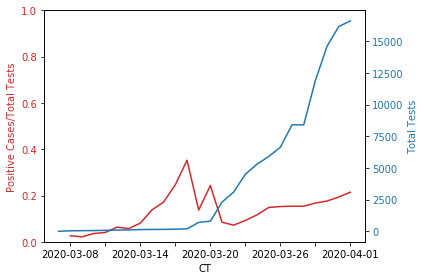

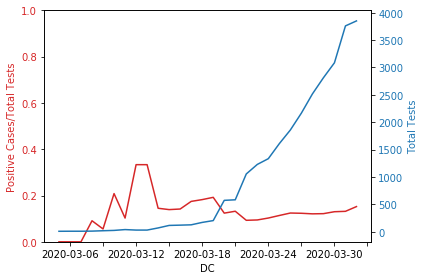

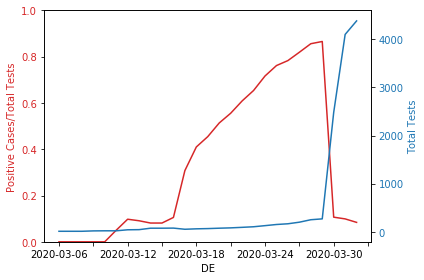

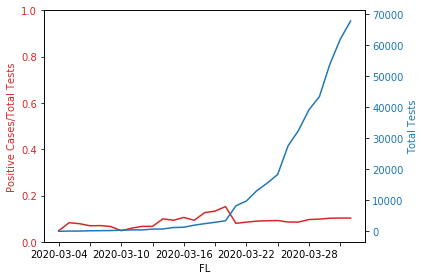

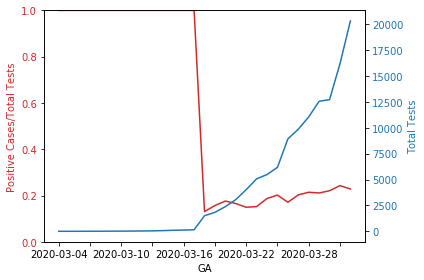

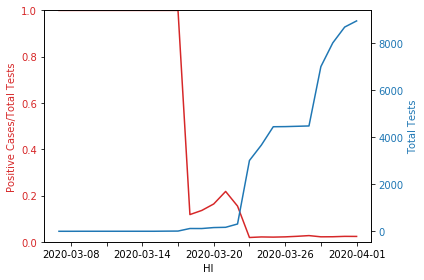

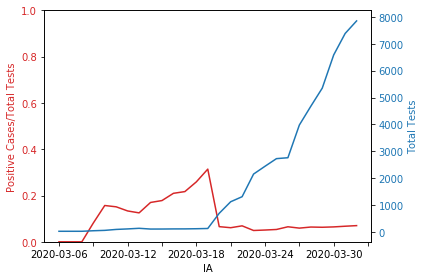

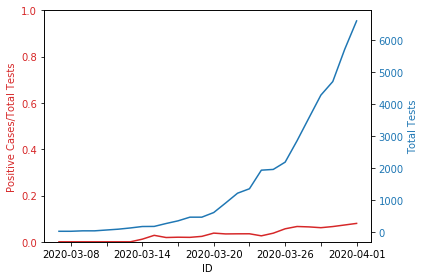

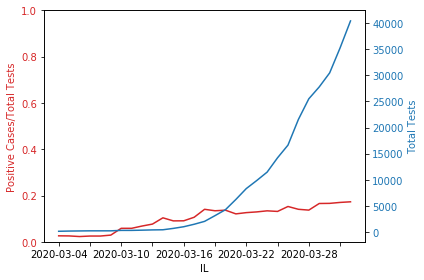

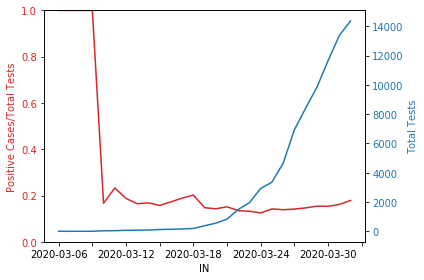

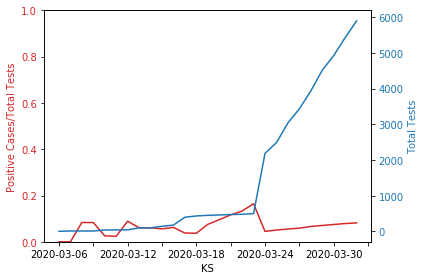

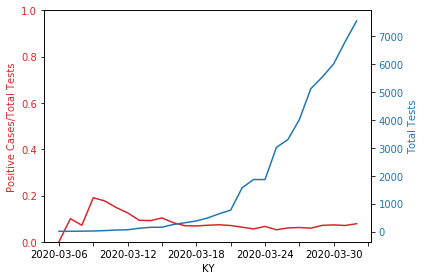

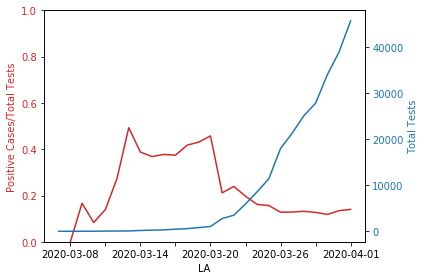

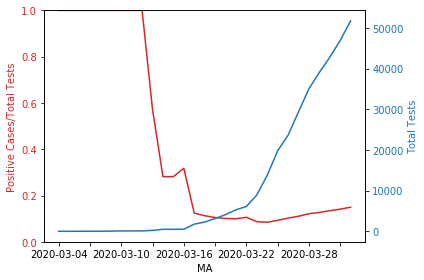

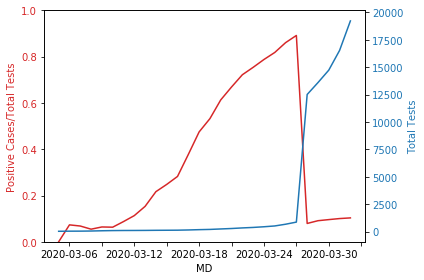

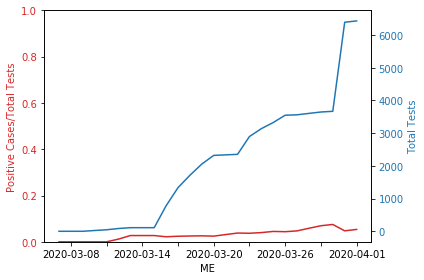

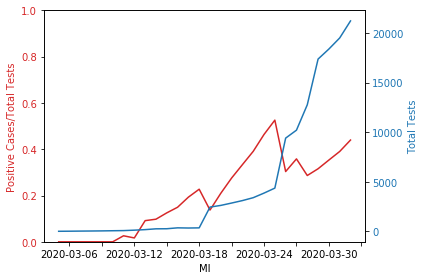

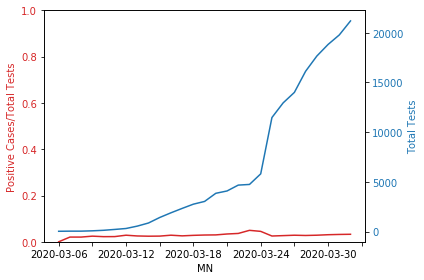

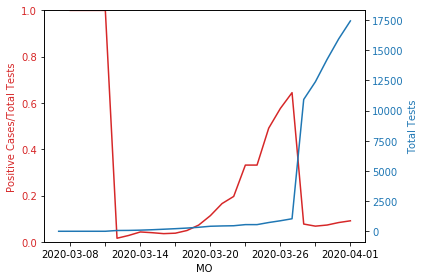

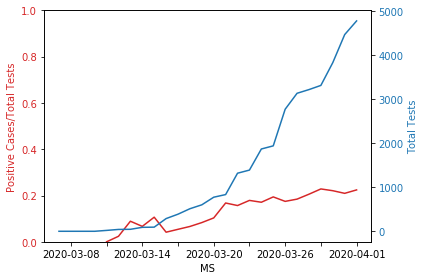

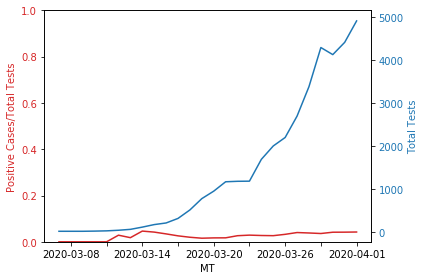

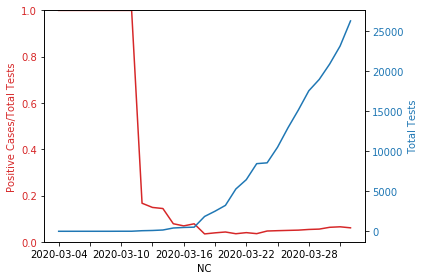

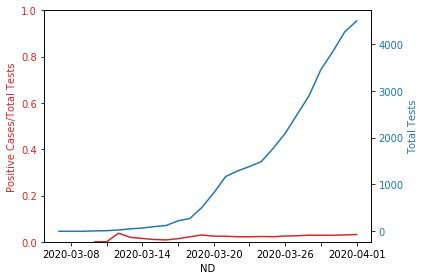

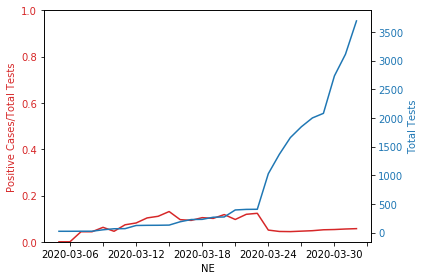

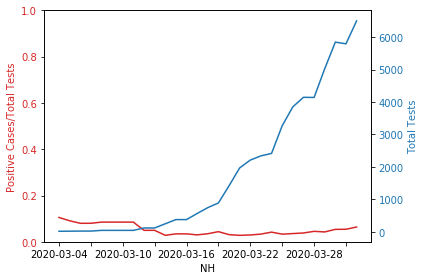

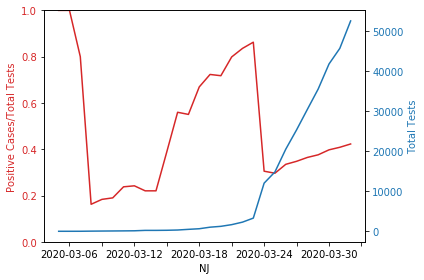

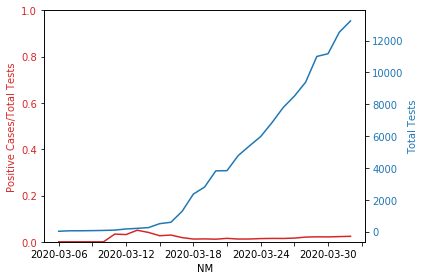

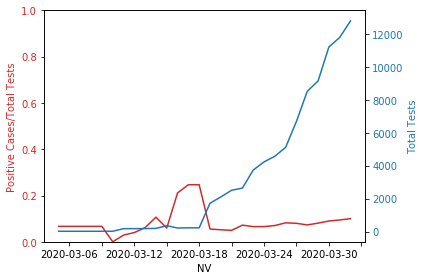

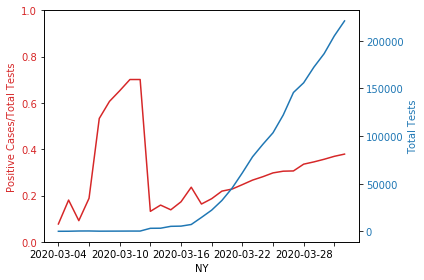

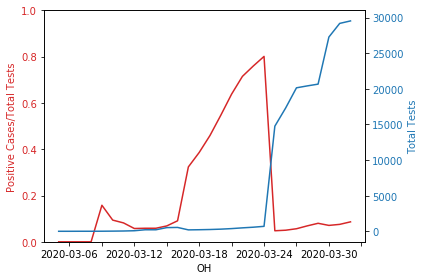

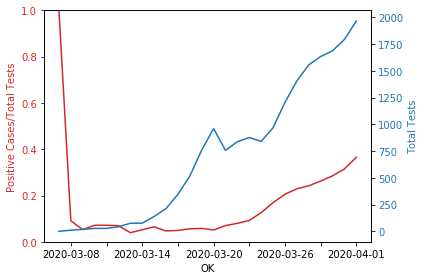

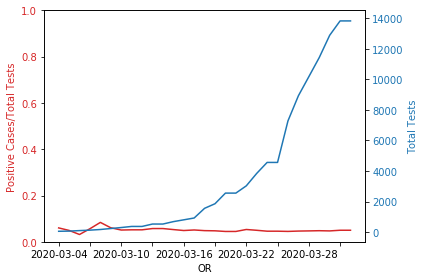

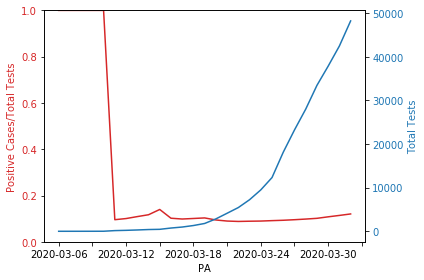

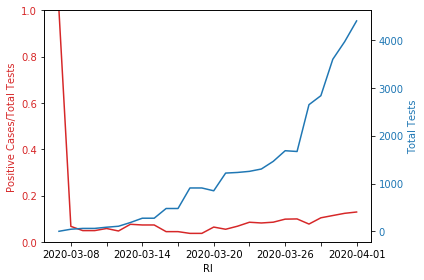

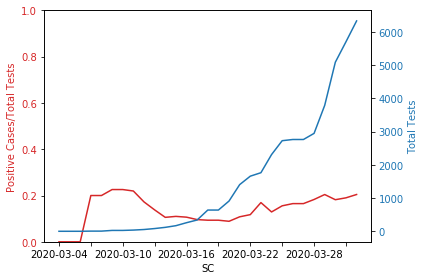

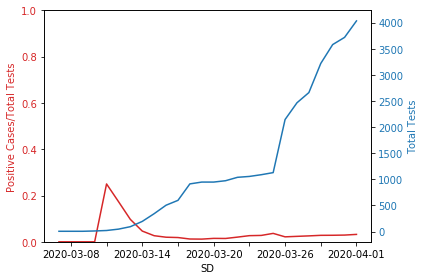

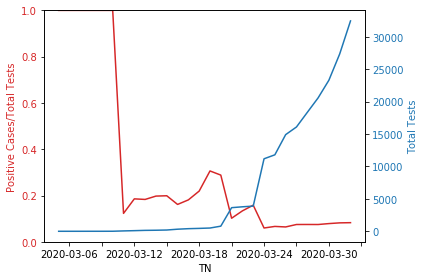

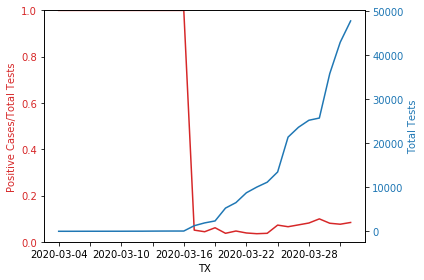

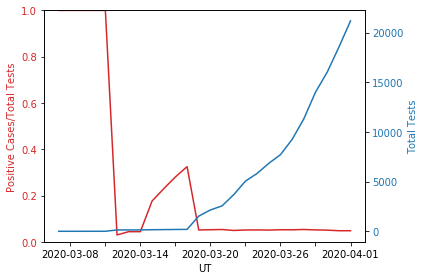

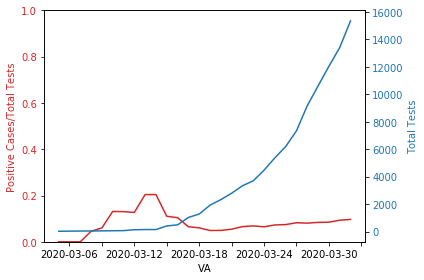

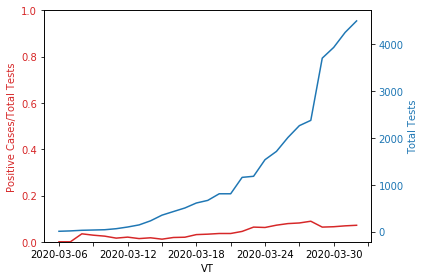

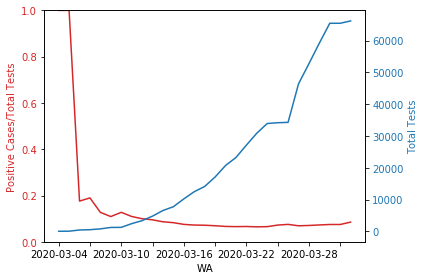

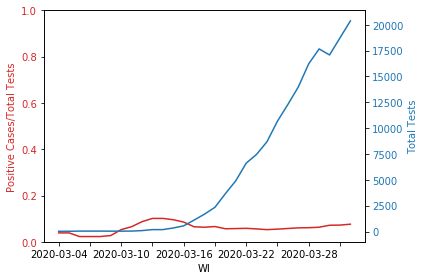

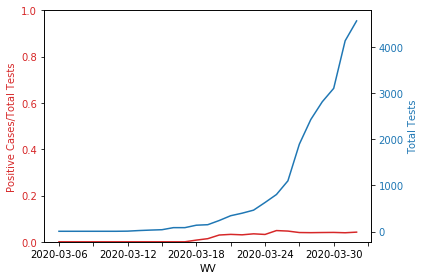

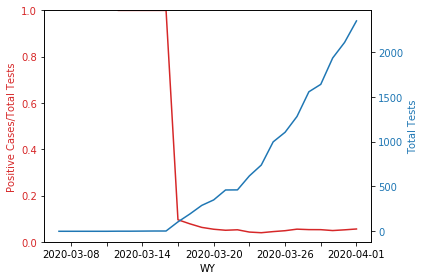

In [32]:
state_list = states['state']

for state in state_list:
    S =daily[daily['state'] == state]
    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.set_xlabel(state)
    ax1.set_ylabel('Positive Cases/Total Tests', color=color)
    ax1.plot(S['date'],S['frac'],color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_ylim((0,1))

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('Total Tests', color=color)  # we already handled the x-label with ax1
    ax2.plot(S['date'], S['total'], color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    every_nth = 2
    for n, label in enumerate(ax1.xaxis.get_ticklabels()):
        if n % every_nth != 0:
            label.set_visible(False)
    plt.show()
    

In [33]:
state_pop = pd.read_excel('state_populations.xlsx',header=3)
state_pop = state_pop[['Census']].iloc[:-7,:]
statename_to_abbr = {
    # Other
    'District of Columbia': 'DC',
    
    # States
    'Alabama': 'AL',
    'Montana': 'MT',
    'Alaska': 'AK',
    'Nebraska': 'NE',
    'Arizona': 'AZ',
    'Nevada': 'NV',
    'Arkansas': 'AR',
    'New Hampshire': 'NH',
    'California': 'CA',
    'New Jersey': 'NJ',
    'Colorado': 'CO',
    'New Mexico': 'NM',
    'Connecticut': 'CT',
    'New York': 'NY',
    'Delaware': 'DE',
    'North Carolina': 'NC',
    'Florida': 'FL',
    'North Dakota': 'ND',
    'Georgia': 'GA',
    'Ohio': 'OH',
    'Hawaii': 'HI',
    'Oklahoma': 'OK',
    'Idaho': 'ID',
    'Oregon': 'OR',
    'Illinois': 'IL',
    'Pennsylvania': 'PA',
    'Indiana': 'IN',
    'Rhode Island': 'RI',
    'Iowa': 'IA',
    'South Carolina': 'SC',
    'Kansas': 'KS',
    'South Dakota': 'SD',
    'Kentucky': 'KY',
    'Tennessee': 'TN',
    'Louisiana': 'LA',
    'Texas': 'TX',
    'Maine': 'ME',
    'Utah': 'UT',
    'Maryland': 'MD',
    'Vermont': 'VT',
    'Massachusetts': 'MA',
    'Virginia': 'VA',
    'Michigan': 'MI',
    'Washington': 'WA',
    'Minnesota': 'MN',
    'West Virginia': 'WV',
    'Mississippi': 'MS',
    'Wisconsin': 'WI',
    'Missouri': 'MO',
    'Wyoming': 'WY',
}
abbr_to_statename = {y:x for x,y in statename_to_abbr.items()}
names = list(state_pop.index)
names = [n.replace(".","") for n in names]

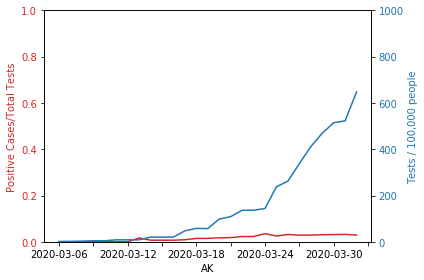

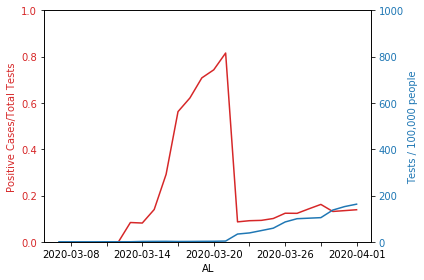

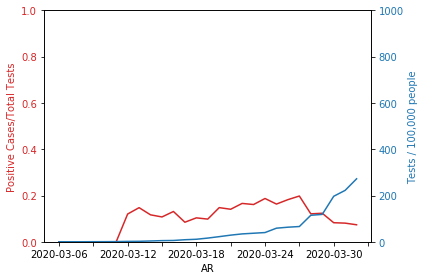

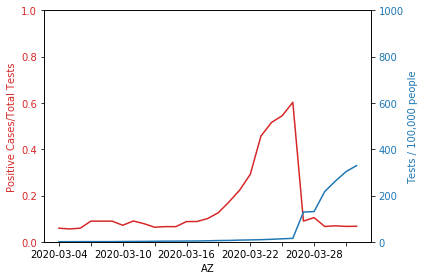

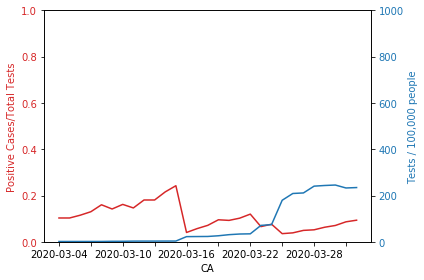

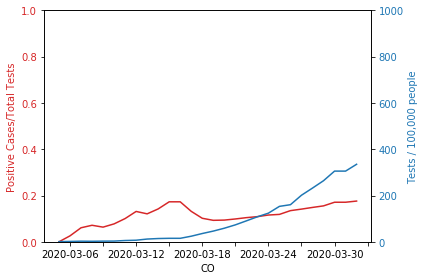

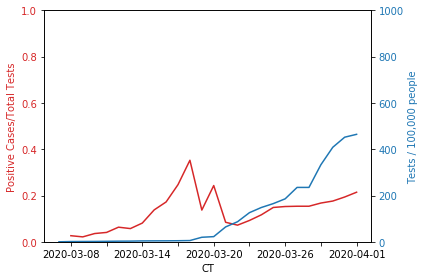

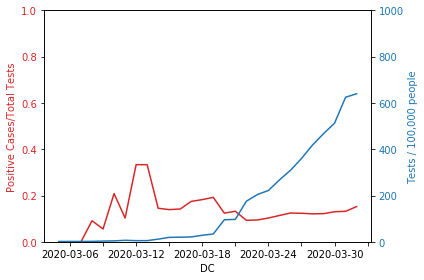

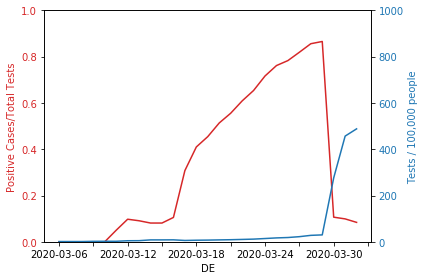

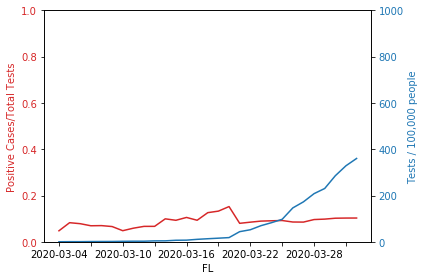

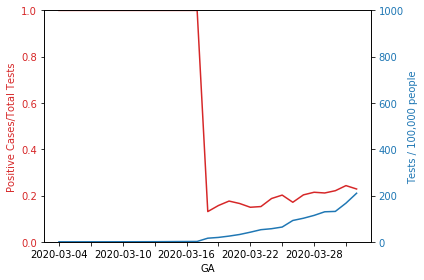

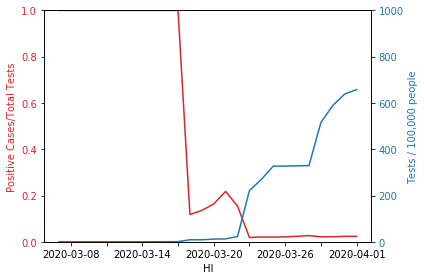

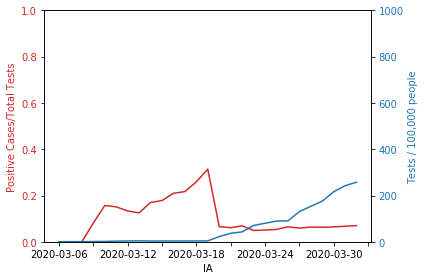

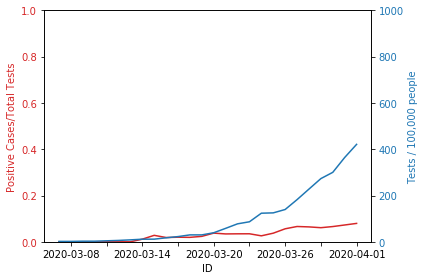

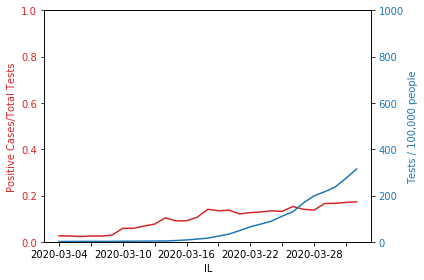

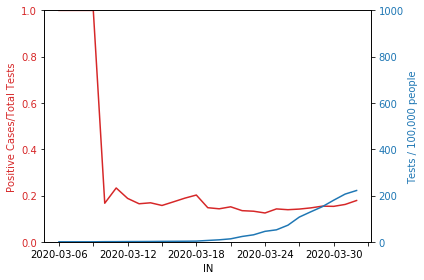

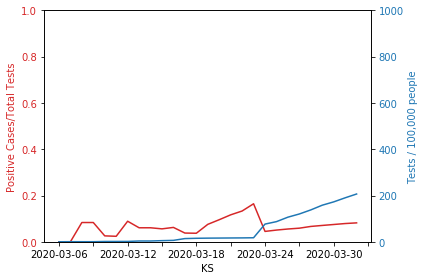

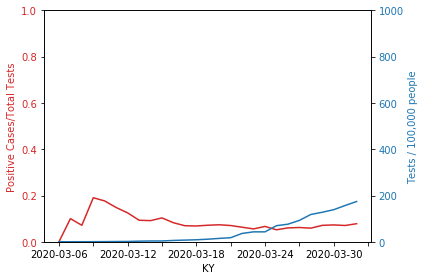

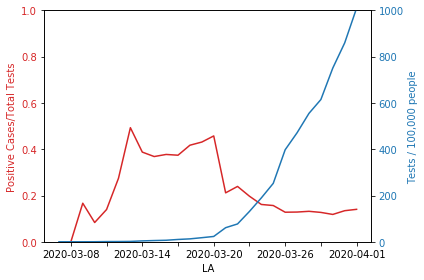

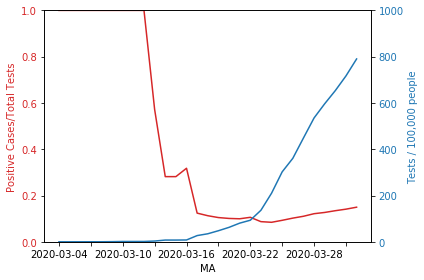

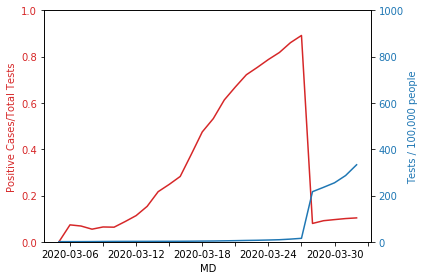

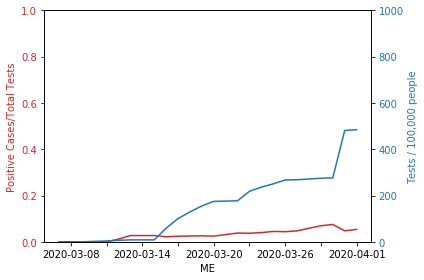

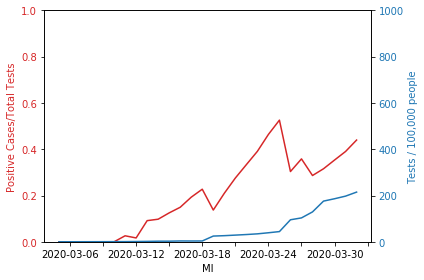

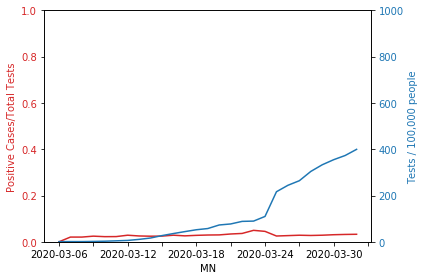

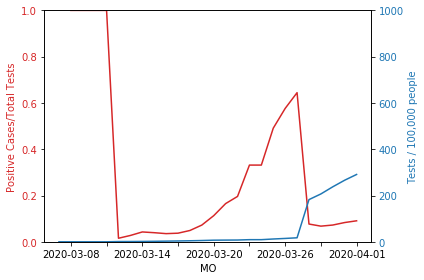

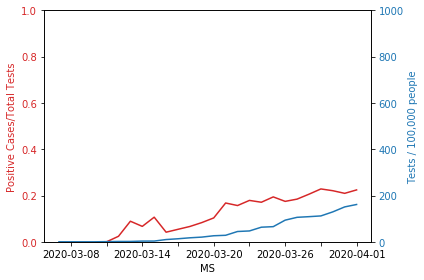

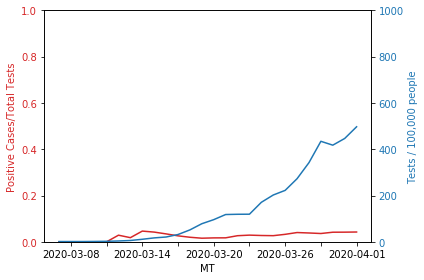

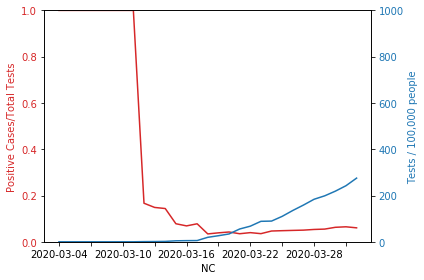

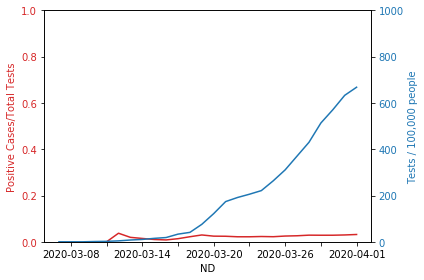

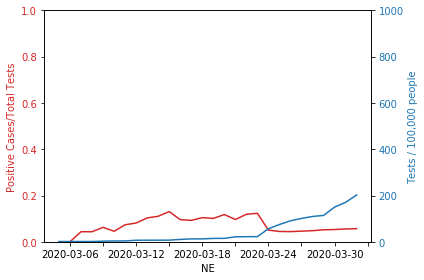

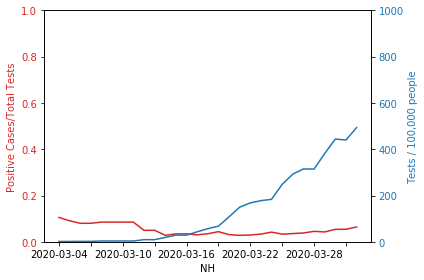

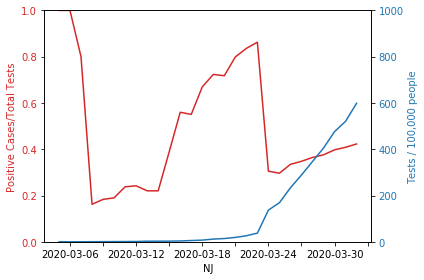

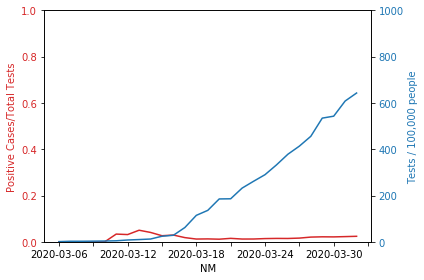

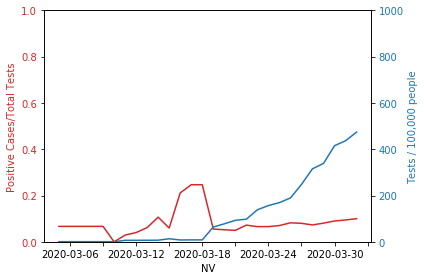

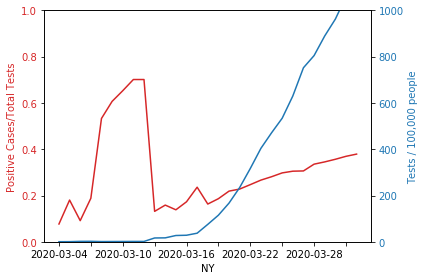

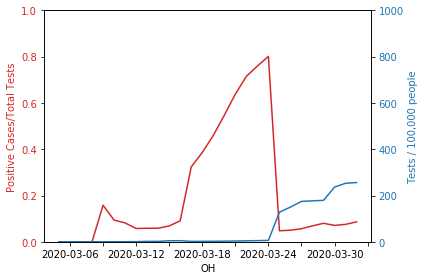

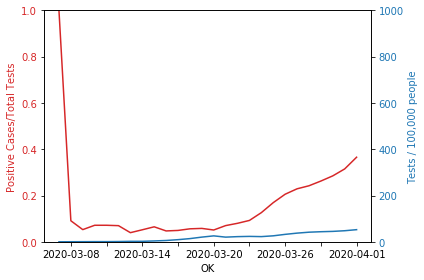

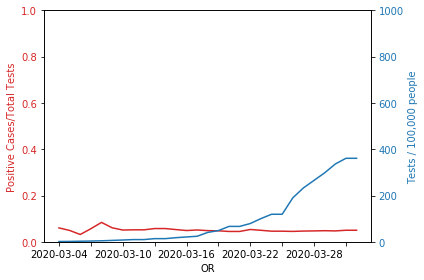

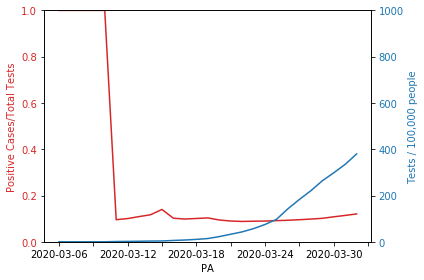

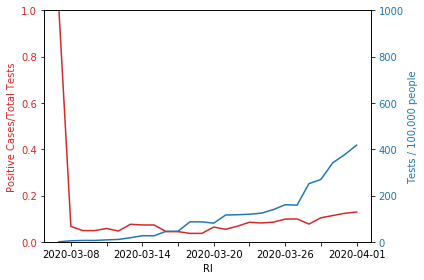

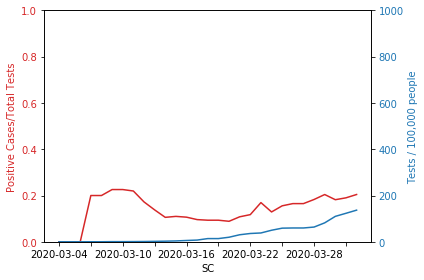

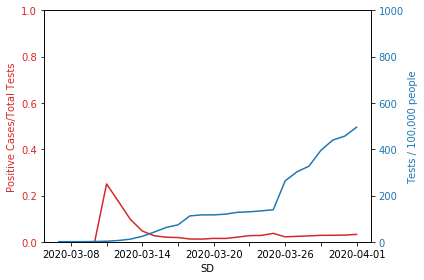

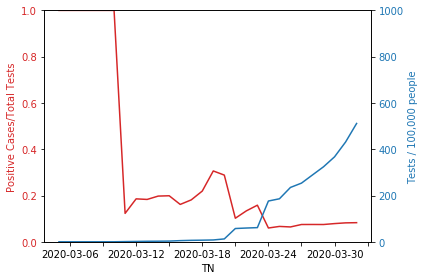

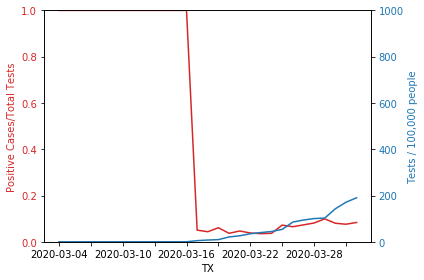

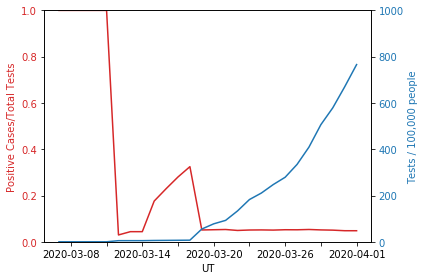

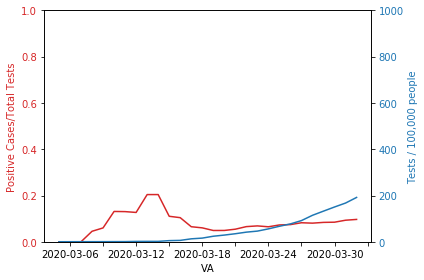

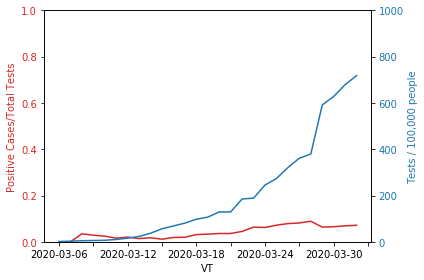

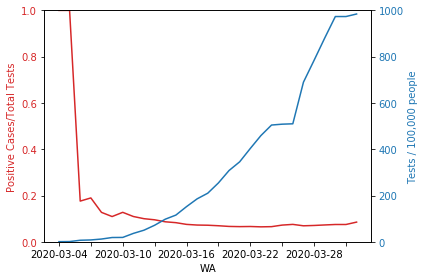

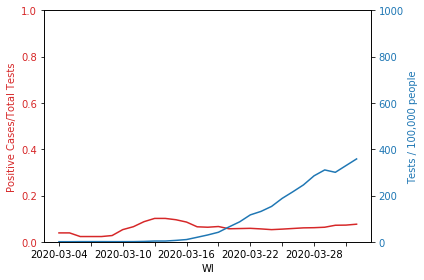

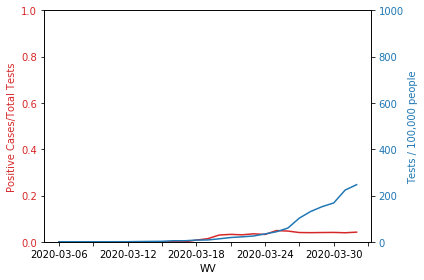

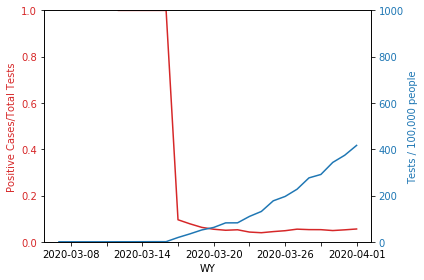

In [34]:
state_list = states['state']

for state in state_list:
    S =daily[daily['state'] == state]
    pop = state_pop.loc['.'+abbr_to_statename[state]]['Census']
    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.set_xlabel(state)
    ax1.set_ylabel('Positive Cases/Total Tests', color=color)
    ax1.plot(S['date'],S['frac'],color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_ylim((0,1))

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('Tests / 100,000 people', color=color)  # we already handled the x-label with ax1
    ax2.plot(S['date'], S['total']/pop*100000, color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_ylim((0,1000))

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    every_nth = 2
    for n, label in enumerate(ax1.xaxis.get_ticklabels()):
        if n % every_nth != 0:
            label.set_visible(False)
    plt.show()
    

## Deaths

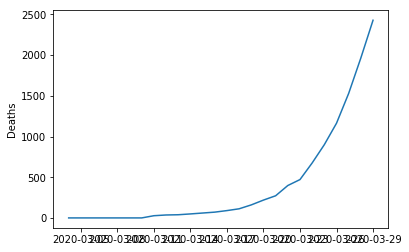

In [19]:
plt.plot(dates, daily.groupby('date')['death'].sum())
plt.ylabel('Deaths')
dlist = []
for state in state_list:
    S = daily[daily['state']==state]
    if S['death'].sum()!=0:
        dlist.append(state)

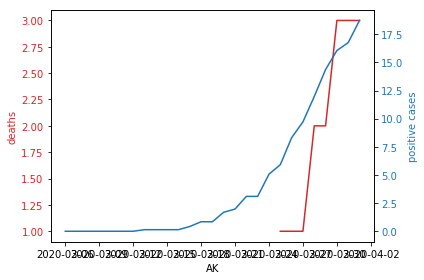

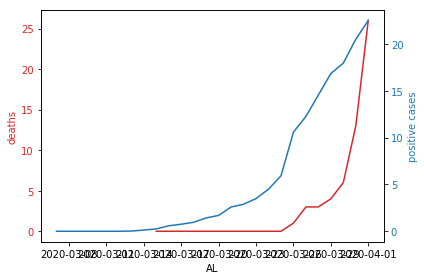

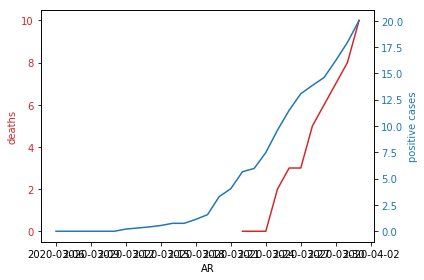

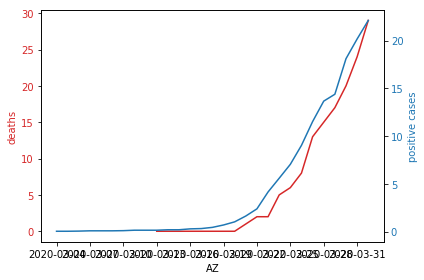

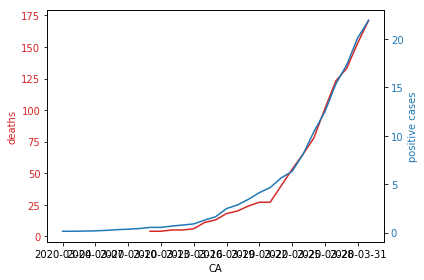

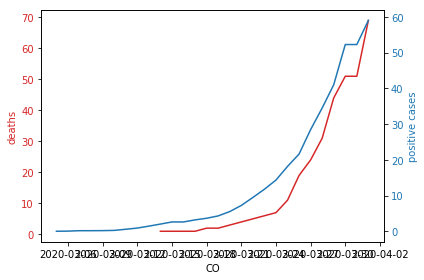

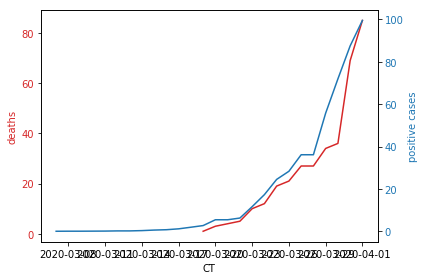

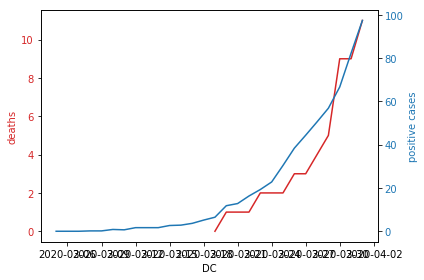

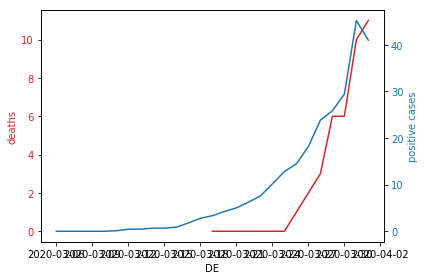

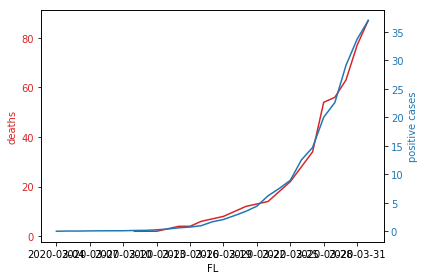

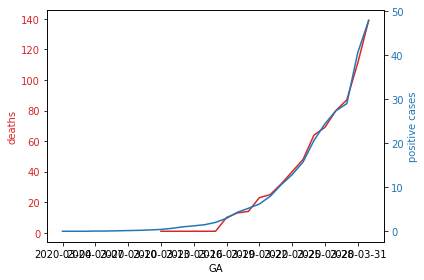

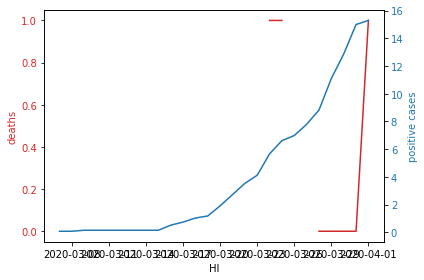

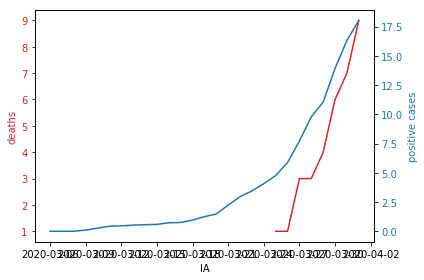

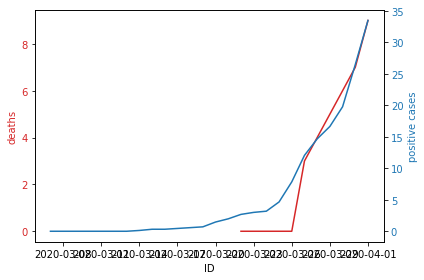

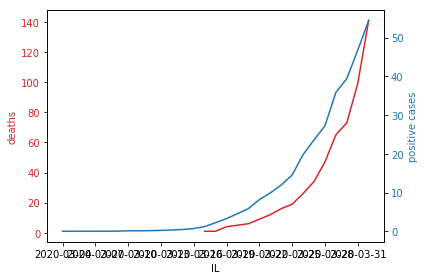

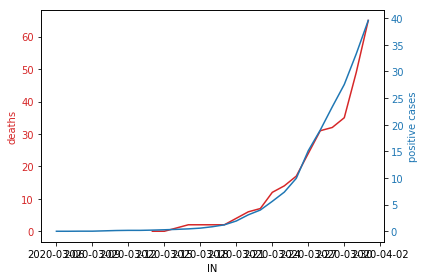

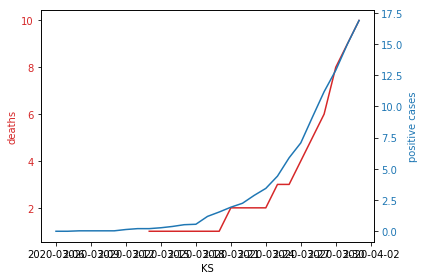

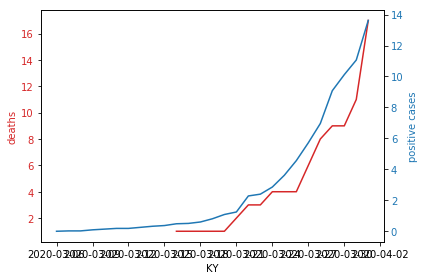

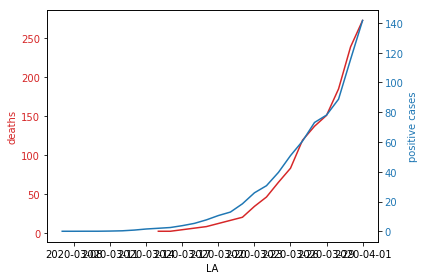

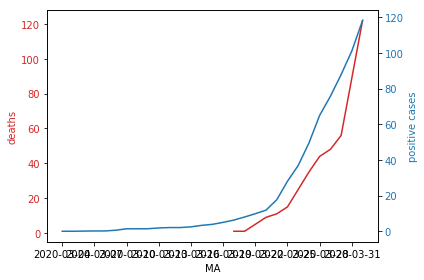

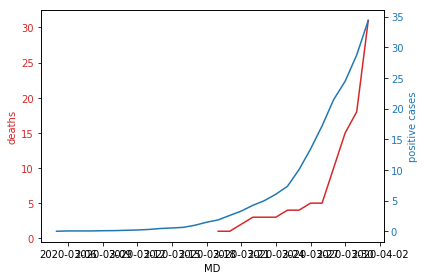

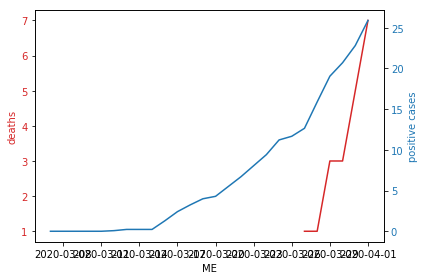

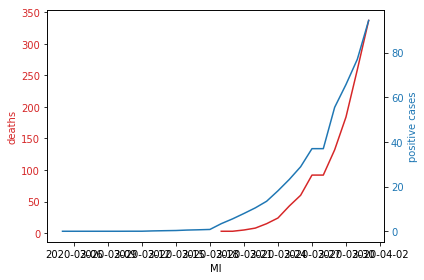

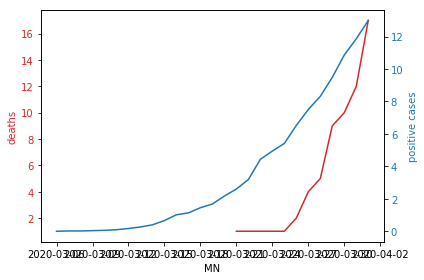

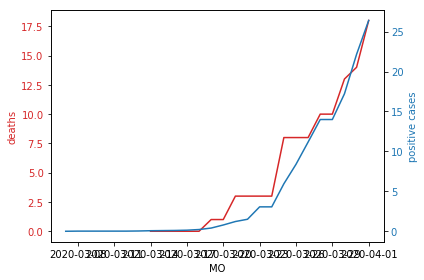

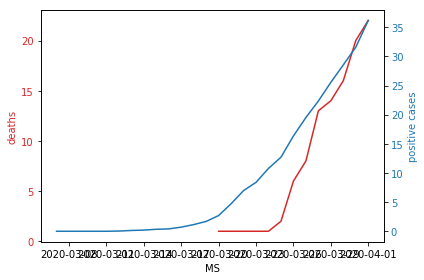

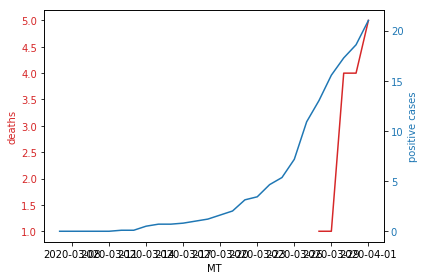

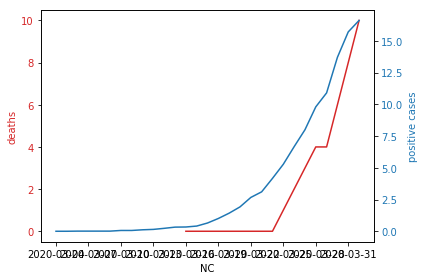

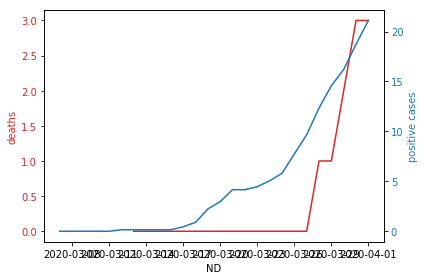

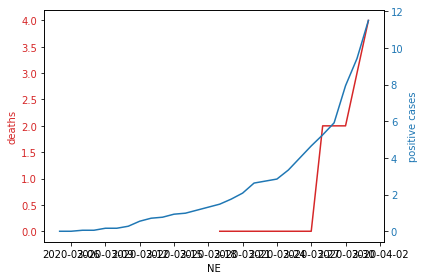

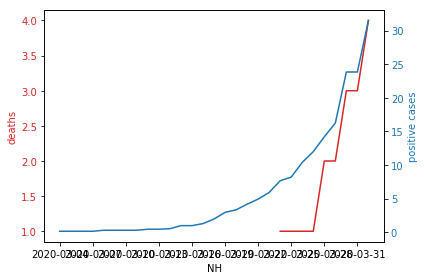

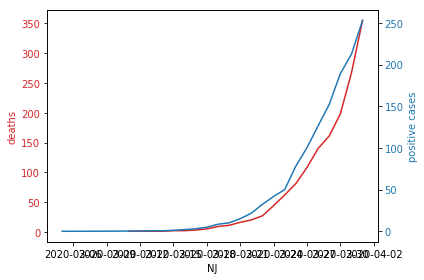

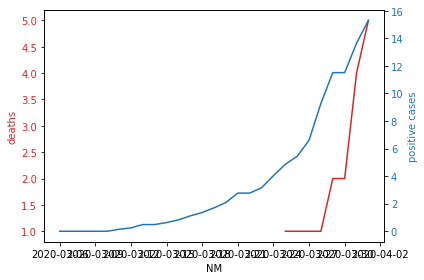

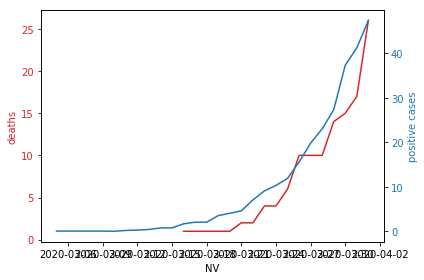

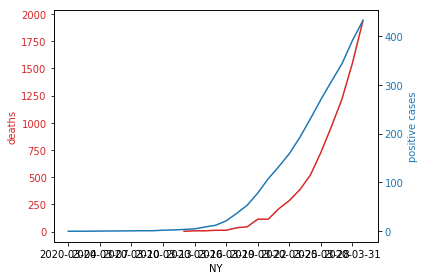

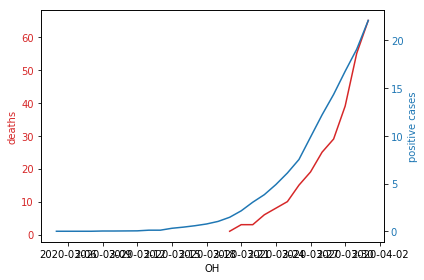

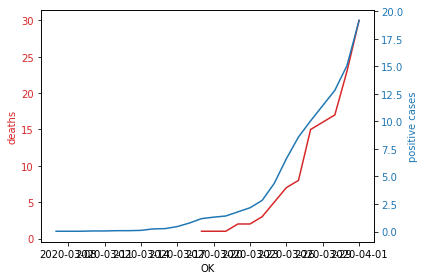

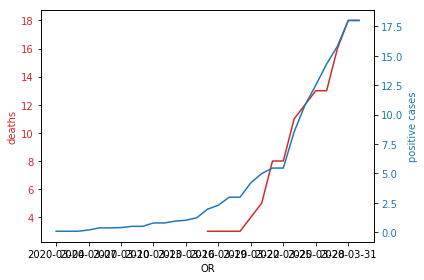

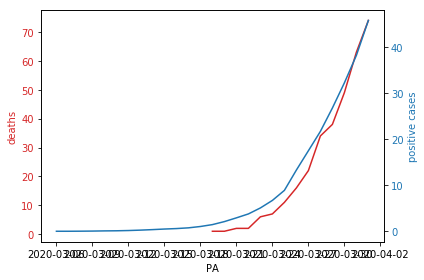

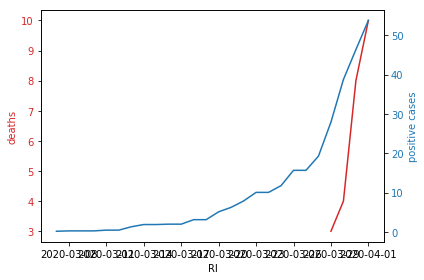

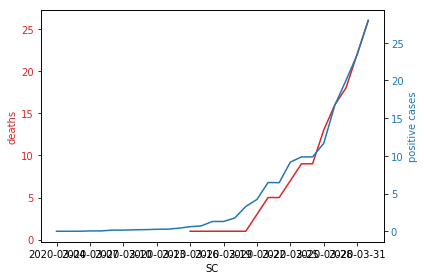

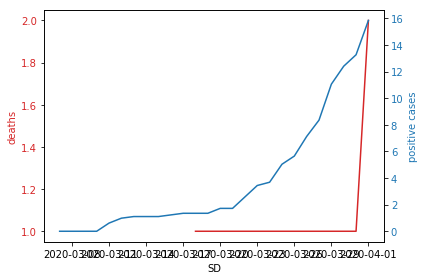

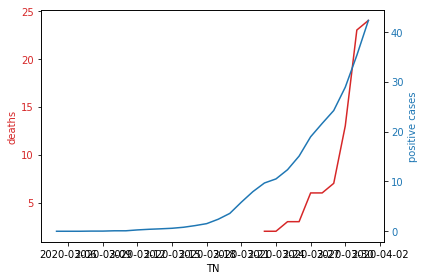

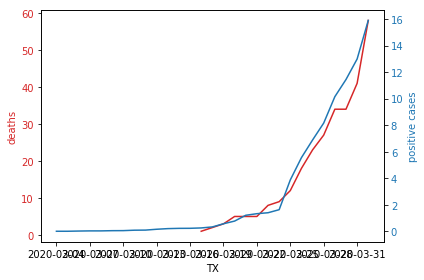

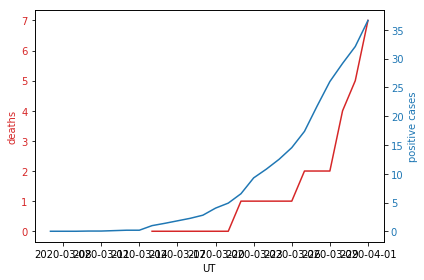

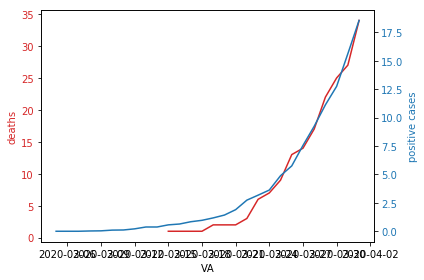

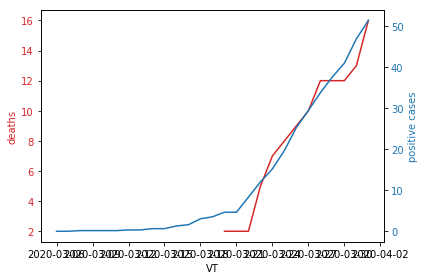

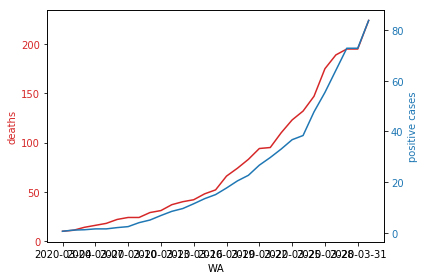

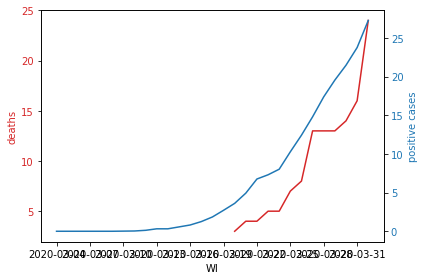

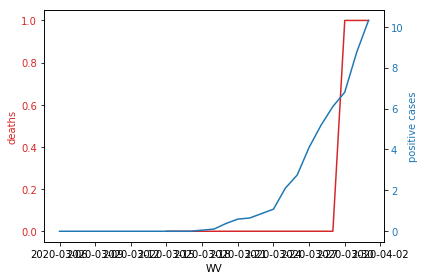

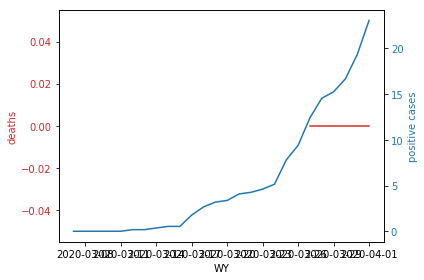

In [147]:
state_list = states['state']

for state in state_list:
    S =daily[daily['state'] == state]
    pop = state_pop.loc['.'+abbr_to_statename[state]]['Census']
    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.set_xlabel(state)
    ax1.set_ylabel('deaths', color=color)
    ax1.plot(S['date'],S['death'],color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('positive cases', color=color)  # we already handled the x-label with ax1
    ax2.plot(S['date'], S['positive']/pop*100000, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
    every_nth = 2
    for n, label in enumerate(ax1.xaxis.get_ticklabels()):
        if n % every_nth != 0:
            label.set_visible(False)

## Week to week growth rate

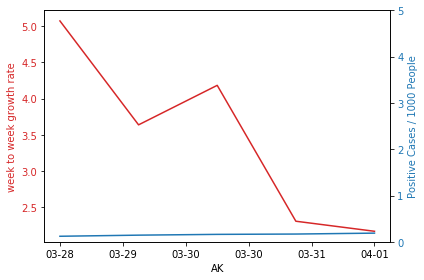

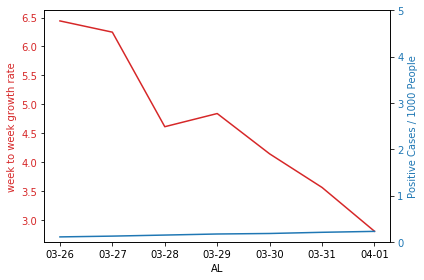

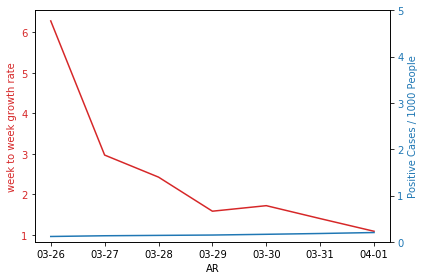

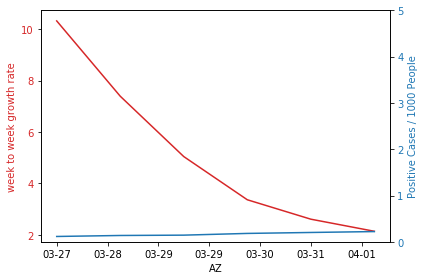

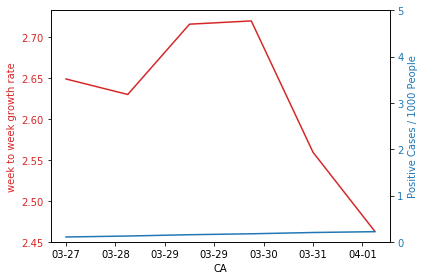

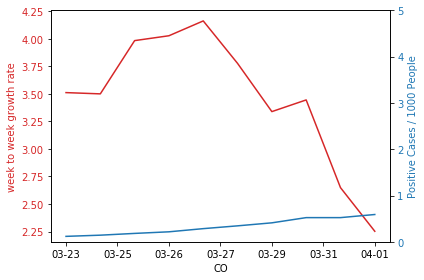

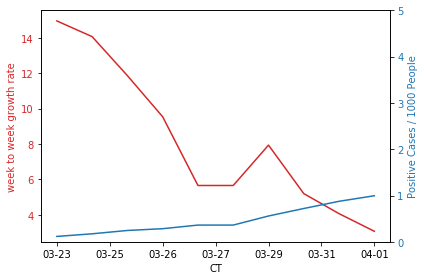

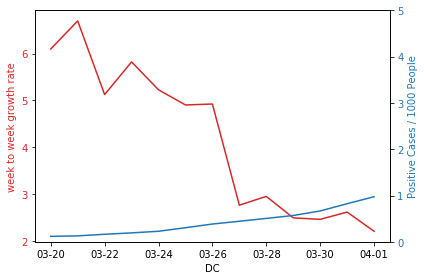

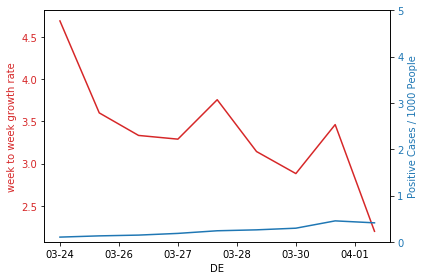

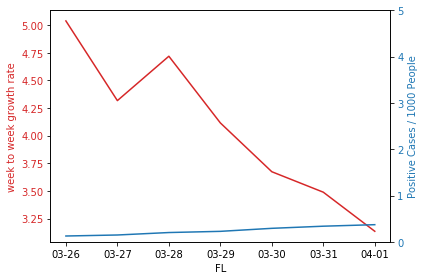

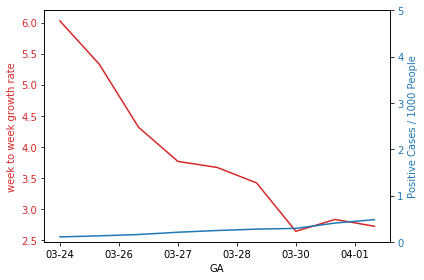

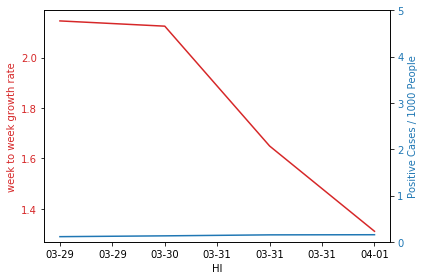

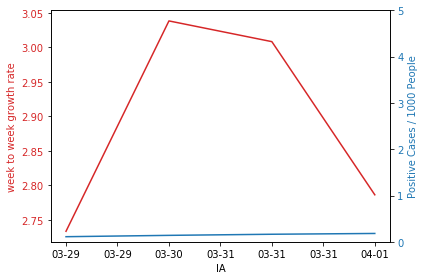

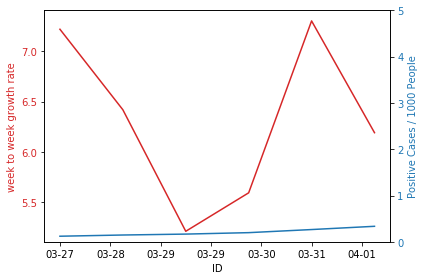

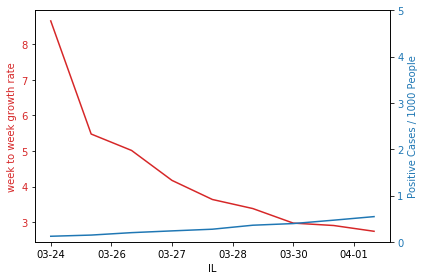

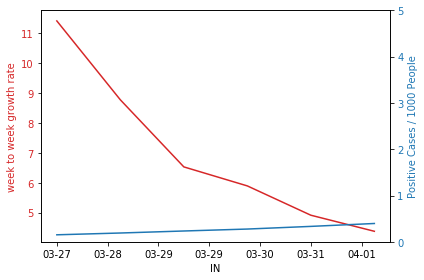

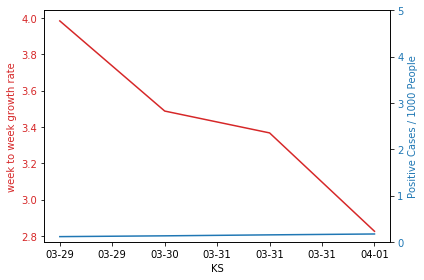

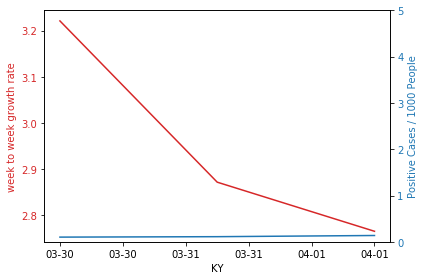

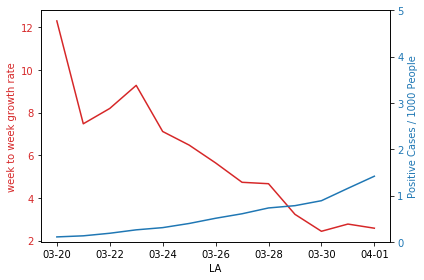

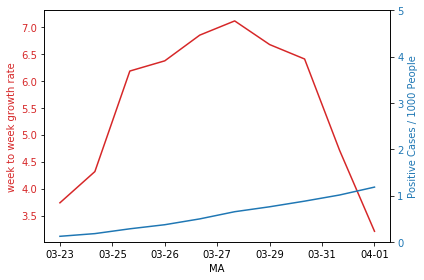

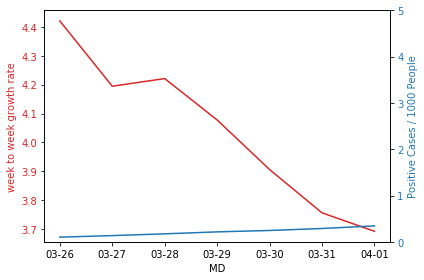

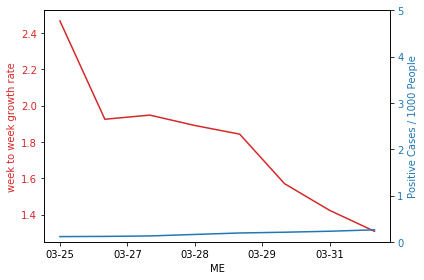

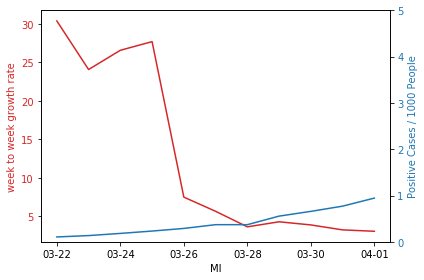

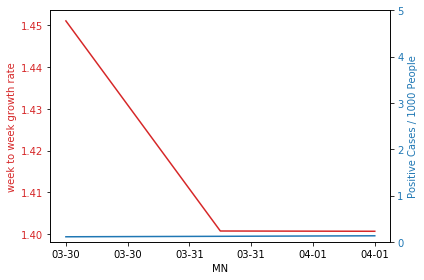

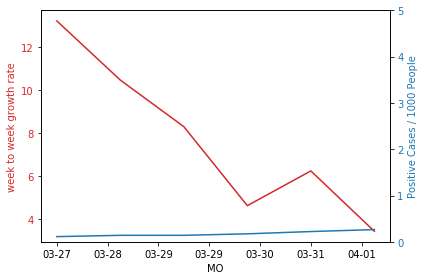

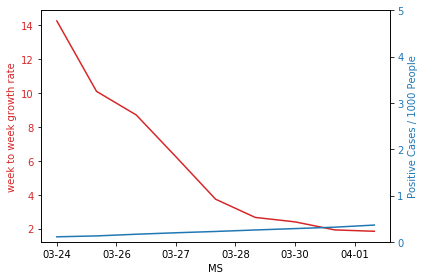

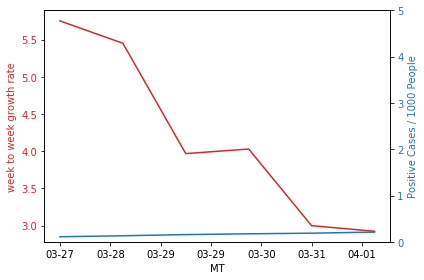

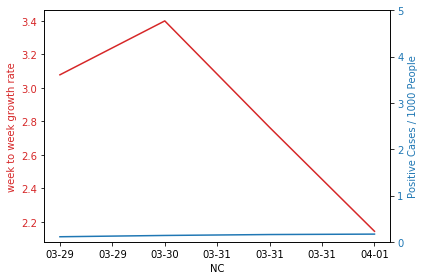

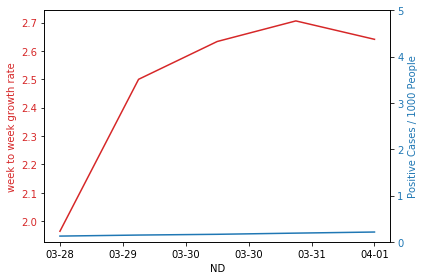

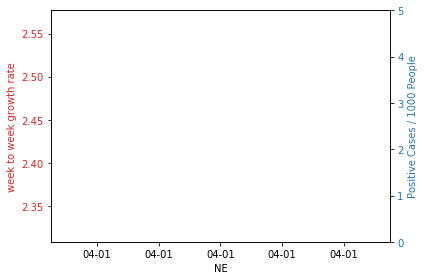

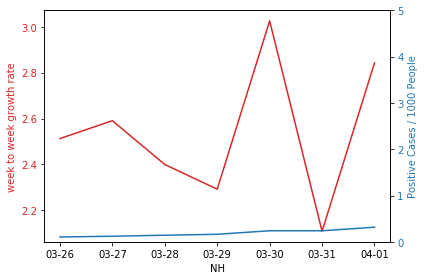

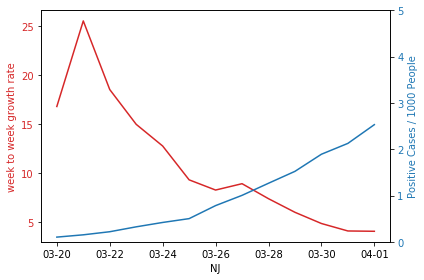

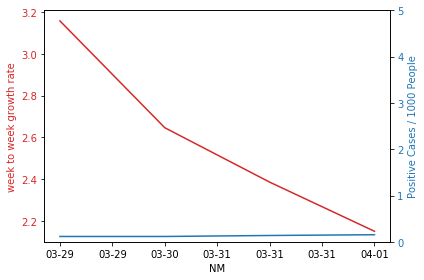

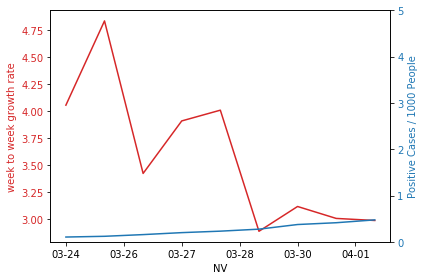

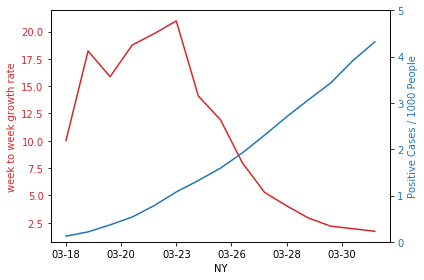

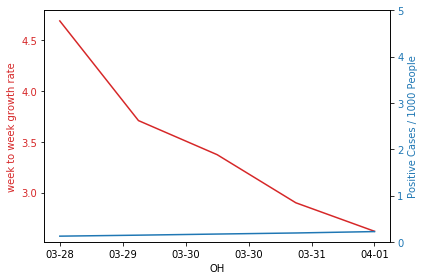

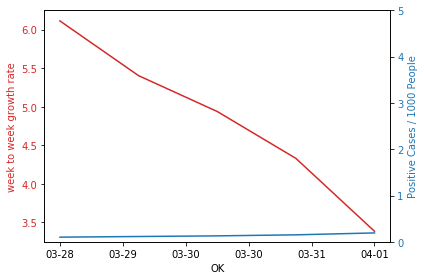

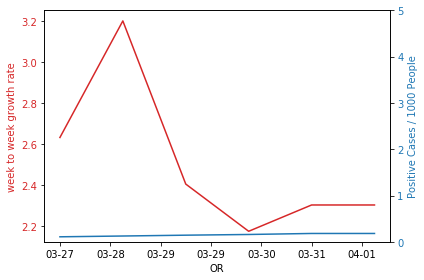

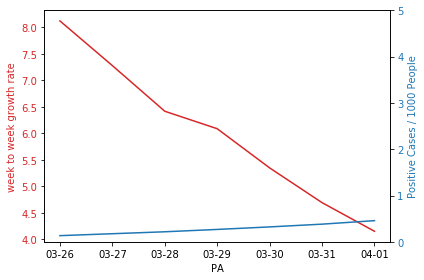

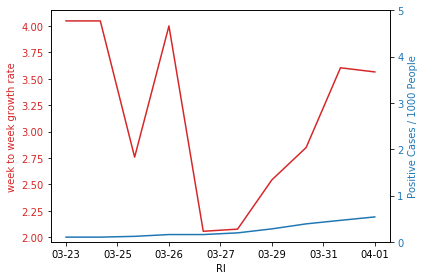

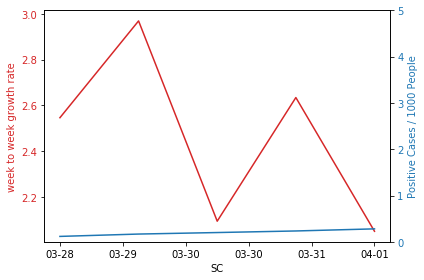

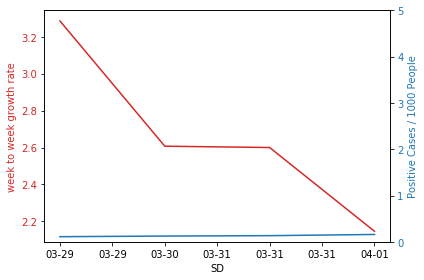

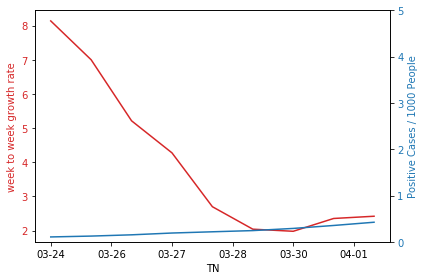

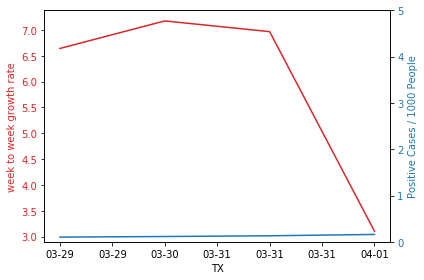

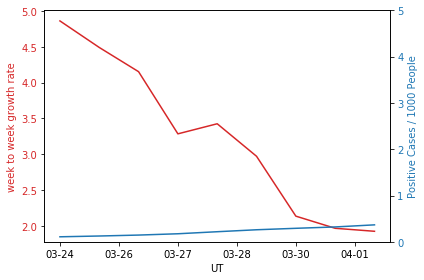

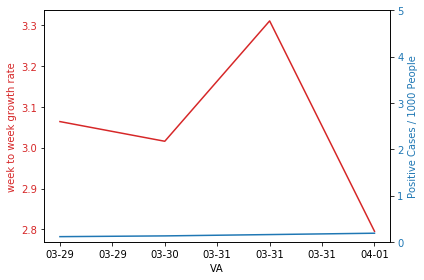

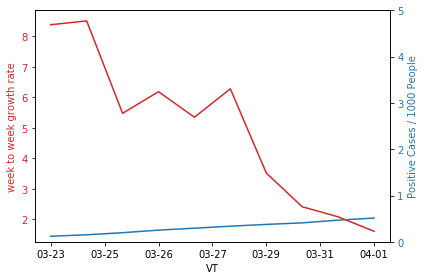

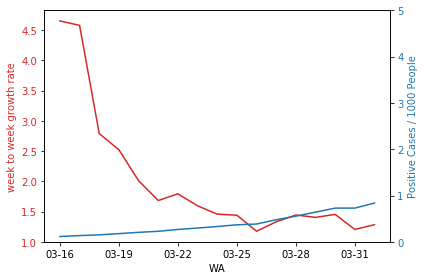

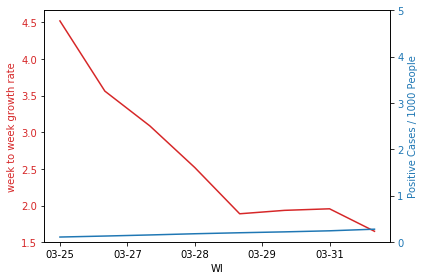

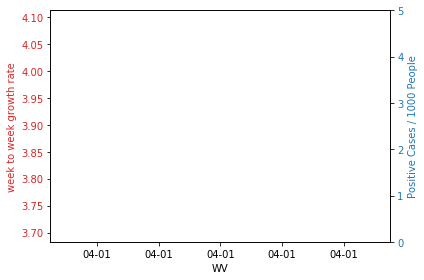

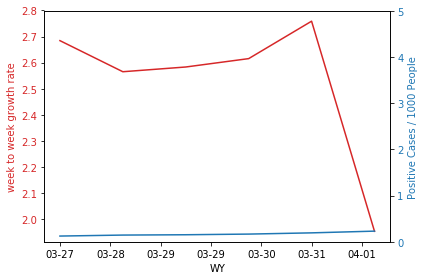

In [145]:
state_list = states['state']

for state in state_list:
    S =daily[daily['state'] == state].sort_values('date',ascending=True)
    pop = state_pop.loc['.'+abbr_to_statename[state]]['Census']
    S['percent_pos_change'] = S['positive'].pct_change(7)
    S['date'] = S['date'].dt.strftime('%m-%d')
    S = S[S['positive']/pop*1000>.1]
    S = S[['date','percent_pos_change','positive']].replace([np.inf, -np.inf], np.nan).dropna()
    
    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.set_xlabel(state)
    ax1.set_ylabel('week to week growth rate',color=color)
    ax1.plot(S['date'],S['percent_pos_change'],color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('Positive Cases / 1000 People', color=color)  # we already handled the x-label with ax1
    ax2.plot(S['date'], S['positive']/pop*1000, color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.xaxis.set_major_locator(plt.MaxNLocator(7))
    ax2.set_ylim(0,5)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
    every_nth = 2

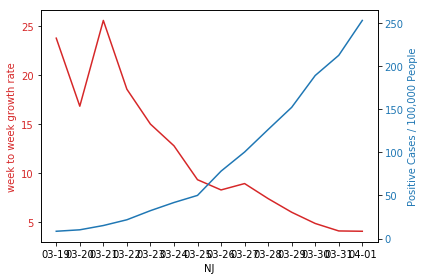

In [132]:
state = 'NJ'
S =daily[daily['state'] == state].sort_values('date',ascending=True)
S['date'] = S['date'].dt.strftime('%m-%d')
pop = state_pop.loc['.'+abbr_to_statename[state]]['Census']
S['percent_pos_change'] = S['positive'].pct_change(7)
S = S[['date','percent_pos_change','positive']].replace([np.inf, -np.inf], np.nan).dropna()
S = S[S['positive']>500]

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel(state)
ax1.set_ylabel('week to week growth rate',color=color)
ax1.plot(S['date'],S['percent_pos_change'],color=color)
ax1.tick_params(axis='y', labelcolor=color)
#ax1.set_ylim((0,2))
#ax1.xaxis.set_major_locator(plt.MaxNLocator(1))

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Positive Cases / 100,000 People', color=color)  # we already handled the x-label with ax1
ax2.plot(S['date'], S['positive']/pop*100000, color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim((0,8000))

#ax2.xaxis.set_major_locator(plt.MaxNLocator(7))

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()